# TOPO 2 Matching is done outside the blockchain network


In this case, when an organ becomes available, it is first added to the blockchain. Then, a list od available candidates is queried from the blockchain. After that a suitable candidate is found and the organ is transfered to the matched candidate.

In [1]:
#Library Setup
from time import clock
import sys
sys.path.append("/home/utsav_jain/RenewThesis/fabric/organ_chain")
from log_analysis import PeerContainer, get_time, time_to_commit, set_blocks_info
#Graphs
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

peer_names=["peer0.gp.organ.com",
          "peer1.gp.organ.com",
           "peer0.histocompatibility.organ.com",
           "peer1.histocompatibility.organ.com",
           "peer0.opo.organ.com",
           "peer1.opo.organ.com",
           "peer0.hospital.organ.com",
           "peer1.hospital.organ.com"]

base = "/home/utsav_jain/RenewThesis/fabric/organ_chain/TOPO2/"

class TxnTimes:
    'This is txn times'
    def __init__(self, receive_time = 0, validate_time = 0, commmit_time = 0):
        self.receive_time = receive_time
        self.validate_time = validate_time
        self.commmit_time = commmit_time

class Block:
    def __init__(self, block_number):
        self.__name__ = str(block_number)
        self.block_number = block_number
        self.peers_times = {}
        
    def add_peer(self, peer_name, block_receive_time, block_validated_time, block_commited_time, verbose=False):
        '''
            This involves getting the block receive time, block validated time and the block commit time.
        '''

        t = TxnTimes(block_receive_time, block_validated_time, block_commited_time)
        
        self.peers_times[peer_name] = t
        if(verbose is True):
            print('Adding %s with rt %s, vt %s and ct %s' %(peer_name, block_receive_time, block_validated_time, block_commited_time))
        
    def get_longest_commit_time():
        largest = self.peer.itervalues().next()[2]
        for peer_id, time_array in self.peer:
            if(time_array[2]):
                pass
    def print_block_info():
        print("Block Number %s" % self.block_number)
        print("Peer Informa")
    
    def get_smallest_commit_time():
        pass
    
    def get_propogation_time(self, peers):
        commit_times = []
        receive_times = []
        for peer in self.peers_times:
            commit_times.append(self.peers_times[peer].commmit_time)
            receive_times.append(self.peers_times[peer].receive_time)
        max_commit_time = max(commit_times)
        min_receive_time = min(receive_times)
        return(max_commit_time - min_receive_time)

def get_propogation_times(log_files):
    '''
        STEPS:
            1. Setup the all_peers {}
            2. Extracct receive times
            3. Extract validation times
            4. Extract commit times
            5. Return Propogation times
    '''
    print("Starting STEP 1: Setup the all_peers dict")
    all_peers = {}
    for container in peer_names:
        
        start = clock()
        all_peers[container] = PeerContainer(str(container), log_files[container])
        set_blocks_info(all_peers[container])
        delta = clock() - start
        print("\t Set logs for %s in %s Sec" % (container, delta))
        
    print("Starting Step 2: Extract receive times.")
    
    # Adding block received times to the PeerContainer object
    start = 0
    start = clock()
    for peer in peer_names:
        l = ((all_peers[peer].find_received_block()))
#         print('\tThere are %s Recevied Lines in %s' % (len(l), peer))
        number_of_blocks = len(l)
        for line in l:
            pattern = 'Received block ['
            start = line['log'].find(pattern)
            if start == -1:
                continue
            x = line['log'][start + len(pattern):]
            end = x.find(']')
            if end == -1:
                continue
            block_number = x[:end]
            time = get_time(line)
            all_peers[peer].block_times[int(block_number)] = [time]
    delta = clock() - start
    print("\t Done Extracting Receive Times in %s Sec" % (delta))
    print("Stating Step 3: Extract validation times.")
    start = 0
    start = clock()
    for peer in peer_names:
        l = ((all_peers[peer].find_validated_block()))
#         print('\tThere are %s Validated Lines in %s' % (len(l), peer))
        number_of_blocks = len(l)
        for line in l:
            pattern = 'Validated block ['
            start = line['log'].find(pattern)
            if start == -1:
                continue
            x = line['log'][start + len(pattern):]
            end = x.find(']')
            if end == -1:
                continue
            block_number = x[:end]
            time = get_time(line)
            try:
                all_peers[peer].block_times[int(block_number)].append(time)
            except:
                pass
    #         print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))
    delta = clock() - start
    print("\t Done Extracting Validation Times in %s Sec" % (delta))
    print("Stating Step 4: Extract commit times.")
    start = 0
    start = clock()
    for peer in peer_names:
        l = ((all_peers[peer].find_commited_block()))
#         print('\tThere are %s Committed Line %s' % (len(l), peer))
        number_of_blocks = len(l)
        for line in l:
            pattern = 'Committed block ['
            start = line['log'].find(pattern)
            if start == -1:
                continue
            x = line['log'][start + len(pattern):]
            end = x.find(']')
            if end == -1:
                continue
            block_number = x[:end]
            time = get_time(line)
            try:
                all_peers[peer].block_times[int(block_number)].append(time)
            except:
                pass
    delta = clock() - start
    print("\t Done Extracting Validation Times in %s Sec" % (delta))
    print("Starting Step 5: Return Propogation Time")
    blocks = {}
    # print(all_peers)
    for j, peer in enumerate(all_peers):
        print("\t Processing %s" % peer)
    #     print(all_peers[peer].block_times)
    #     print(len(all_peers[peer].block_times))
        for i in range(1, len(all_peers[peer].block_times)):
            rt = all_peers[peer].block_times[i][0]
            vt = all_peers[peer].block_times[i][1]
            ct = all_peers[peer].block_times[i][2]
    #         print("rt %s; vt %s; ct %s"% (rt, vt, ct))
            if i not in blocks:
                blocks[i] = Block(i)
            blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
#         print(all_peers[peer].name)

    propogation_times = []
    for i in range(1, len(blocks)):
#         print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
        propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]).total_seconds())
    print("Done")
    return(propogation_times)

# Experiment 1

In [2]:
experiment1Results = []
exp1dir = "/home/utsav_jain/RenewThesis/data2/1_exp/logs_1_"

In [3]:
#Experiment 1 Effect of Time Out Duration
log_files = {}

for container in peer_names:
    log_files[container] = ('%s1/%s.log'%(exp1dir,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment1Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.052805 Sec
	 Set logs for peer1.gp.organ.com in 0.055882 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.053529 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.05664 Sec
	 Set logs for peer0.opo.organ.com in 0.052073 Sec
	 Set logs for peer1.opo.organ.com in 0.053475 Sec
	 Set logs for peer0.hospital.organ.com in 0.053968 Sec
	 Set logs for peer1.hospital.organ.com in 0.084591 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -91.525206 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -95.178835 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -90.84172 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.co

In [4]:
#Experiment 1.1 Batch Time Out of 5 sec with transaction rate of 
log_files = {}
for container in peer_names:
    log_files[container] = ('%s2/%s.log'%(exp1dir,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment1Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.051667 Sec
	 Set logs for peer1.gp.organ.com in 0.053684 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.051183 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.054769 Sec
	 Set logs for peer0.opo.organ.com in 0.05198 Sec
	 Set logs for peer1.opo.organ.com in 0.051582 Sec
	 Set logs for peer0.hospital.organ.com in 0.055141 Sec
	 Set logs for peer1.hospital.organ.com in 0.050628 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -90.019448 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -93.672923 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -89.329685 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.c

In [5]:
#Experiment 1.3 Batch Time Out of 5 sec with transaction rate of
log_files = {}
for container in peer_names:
    log_files[container] = ('%s3/%s.log'%(exp1dir,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment1Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.078896 Sec
	 Set logs for peer1.gp.organ.com in 0.049619 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.054076 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.051227 Sec
	 Set logs for peer0.opo.organ.com in 0.050017 Sec
	 Set logs for peer1.opo.organ.com in 0.049416 Sec
	 Set logs for peer0.hospital.organ.com in 0.050649 Sec
	 Set logs for peer1.hospital.organ.com in 0.0506 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -88.64722 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -92.454174 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -88.258417 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.com

In [6]:
#Experiment 1.4 Batch Time Out of 5 sec with transaction rate of
log_files = {}
for container in peer_names:
    log_files[container] = ('%s4/%s.log'%(exp1dir,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment1Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.046649 Sec
	 Set logs for peer1.gp.organ.com in 0.053644 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.051545 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.052137 Sec
	 Set logs for peer0.opo.organ.com in 0.049412 Sec
	 Set logs for peer1.opo.organ.com in 0.051756 Sec
	 Set logs for peer0.hospital.organ.com in 0.051213 Sec
	 Set logs for peer1.hospital.organ.com in 0.048554 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -87.659794 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -91.510966 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -87.357197 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.

# Experiment 2

Experiment 2 
Steps to create results
1. Read the log files for each peer
2. Extract Lines
    2.1 Received Lines
    2.2 Validated Lines
    2.3 Commited Lines
3. Find the propogation time 
4. Make graphs


In [7]:
experiment2Results =[]
# exp1dir = "/home/thesis/ocean/organ-procurement-transplant-network/fabric/organ_chain/TOPO2/Experiment1(BatchTImeout)/logs_1_"

In [8]:
#Experiment 2.1
log_files = {}
base = "/home/utsav_jain/RenewThesis/data2/2_exp/logs_2_"
for container in peer_names:
    log_files[container] = ('%s1/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment2Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.025588 Sec
	 Set logs for peer1.gp.organ.com in 0.026762 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.024461 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.026749 Sec
	 Set logs for peer0.opo.organ.com in 0.02867 Sec
	 Set logs for peer1.opo.organ.com in 0.027562 Sec
	 Set logs for peer0.hospital.organ.com in 0.027204 Sec
	 Set logs for peer1.hospital.organ.com in 0.025721 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -86.347363 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -89.562355 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -84.798319 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.c

In [9]:
#Experiment 2.2
log_files = {}

for container in peer_names:
    log_files[container] = ('%s2/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment2Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.027212 Sec
	 Set logs for peer1.gp.organ.com in 0.029002 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.026417 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.025672 Sec
	 Set logs for peer0.opo.organ.com in 0.030617 Sec
	 Set logs for peer1.opo.organ.com in 0.027347 Sec
	 Set logs for peer0.hospital.organ.com in 0.028097 Sec
	 Set logs for peer1.hospital.organ.com in 0.025328 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -83.761543 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -87.012682 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -82.260707 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.

In [10]:
#Experiment 2.3
log_files = {}
for container in peer_names:
    log_files[container] = ('%s3/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment2Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.025785 Sec
	 Set logs for peer1.gp.organ.com in 0.027521 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.024877 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.023687 Sec
	 Set logs for peer0.opo.organ.com in 0.03363 Sec
	 Set logs for peer1.opo.organ.com in 0.055316 Sec
	 Set logs for peer0.hospital.organ.com in 0.029895 Sec
	 Set logs for peer1.hospital.organ.com in 0.025896 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -81.199093 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -84.445136 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -79.71281 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.co

In [11]:
#Experiment 2.4
log_files = {}

for container in peer_names:
    log_files[container] = ('%s4/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
experiment2Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.029106 Sec
	 Set logs for peer1.gp.organ.com in 0.026041 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.025265 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.026302 Sec
	 Set logs for peer0.opo.organ.com in 0.025532 Sec
	 Set logs for peer1.opo.organ.com in 0.02779 Sec
	 Set logs for peer0.hospital.organ.com in 0.025804 Sec
	 Set logs for peer1.hospital.organ.com in 0.026115 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -78.680514 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -81.930783 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -77.156736 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.c

# Experiment 3

In [12]:
experiment3Results =[]
base = "/home/utsav_jain/RenewThesis/data2/3_exp/logs_3_"

In [13]:
#Experiment 3.1
log_files = {}
for container in peer_names:
    log_files[container] = ('%s1/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment3Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.025412 Sec
	 Set logs for peer1.gp.organ.com in 0.02813 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.023902 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.024941 Sec
	 Set logs for peer0.opo.organ.com in 0.02592 Sec
	 Set logs for peer1.opo.organ.com in 0.030109 Sec
	 Set logs for peer0.hospital.organ.com in 0.032668 Sec
	 Set logs for peer1.hospital.organ.com in 0.027707 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -76.110505 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -79.3696 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -74.643313 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.com


In [14]:
#Experiment 3.2
log_files = {}
for container in peer_names:
    log_files[container] = ('%s2/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment3Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.026284 Sec
	 Set logs for peer1.gp.organ.com in 0.027602 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.025269 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.024143 Sec
	 Set logs for peer0.opo.organ.com in 0.025988 Sec
	 Set logs for peer1.opo.organ.com in 0.025289 Sec
	 Set logs for peer0.hospital.organ.com in 0.026547 Sec
	 Set logs for peer1.hospital.organ.com in 0.053486 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -73.604596 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -76.853868 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -72.112665 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.

In [15]:
#Experiment 3.3
log_files = {}

for container in peer_names:
    log_files[container] = ('%s3/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment3Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.027509 Sec
	 Set logs for peer1.gp.organ.com in 0.026152 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.023716 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.023951 Sec
	 Set logs for peer0.opo.organ.com in 0.025402 Sec
	 Set logs for peer1.opo.organ.com in 0.024323 Sec
	 Set logs for peer0.hospital.organ.com in 0.027617 Sec
	 Set logs for peer1.hospital.organ.com in 0.02665 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -71.102507 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -74.360597 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -69.629449 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.c

In [16]:
#Experiment 3.4
log_files = {}

for container in peer_names:
    log_files[container] = ('%s4/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment3Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.027639 Sec
	 Set logs for peer1.gp.organ.com in 0.027048 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.024084 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.024344 Sec
	 Set logs for peer0.opo.organ.com in 0.026319 Sec
	 Set logs for peer1.opo.organ.com in 0.025506 Sec
	 Set logs for peer0.hospital.organ.com in 0.02545 Sec
	 Set logs for peer1.hospital.organ.com in 0.028414 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -68.578741 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -71.831337 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -67.084821 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.c

# Experiment 4

In [17]:
experiment4Results = []
base = "/home/utsav_jain/RenewThesis/data2/4_exp/logs_4_"

In [18]:
#Experiment 4.1
log_files = {}

for container in peer_names:
    log_files[container] = ('%s1/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment4Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.025936 Sec
	 Set logs for peer1.gp.organ.com in 0.02848 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.026108 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.028779 Sec
	 Set logs for peer0.opo.organ.com in 0.024818 Sec
	 Set logs for peer1.opo.organ.com in 0.023936 Sec
	 Set logs for peer0.hospital.organ.com in 0.025267 Sec
	 Set logs for peer1.hospital.organ.com in 0.024287 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -66.01732 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -69.275927 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -64.536831 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.co

In [19]:
#Experiment 4.2
log_files = {}

for container in peer_names:
    log_files[container] = ('%s2/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment4Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.025972 Sec
	 Set logs for peer1.gp.organ.com in 0.023924 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.026554 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.023524 Sec
	 Set logs for peer0.opo.organ.com in 0.024586 Sec
	 Set logs for peer1.opo.organ.com in 0.02474 Sec
	 Set logs for peer0.hospital.organ.com in 0.025593 Sec
	 Set logs for peer1.hospital.organ.com in 0.023561 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -63.531034 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -66.783057 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -62.044411 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.c

In [20]:
#Experiment 4.3
log_files = {}

for container in peer_names:
    log_files[container] = ('%s3/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment4Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.02585 Sec
	 Set logs for peer1.gp.organ.com in 0.026653 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.028791 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.024224 Sec
	 Set logs for peer0.opo.organ.com in 0.02428 Sec
	 Set logs for peer1.opo.organ.com in 0.023886 Sec
	 Set logs for peer0.hospital.organ.com in 0.025921 Sec
	 Set logs for peer1.hospital.organ.com in 0.025435 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -60.998295 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -64.264954 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -59.529807 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.co

In [21]:
#Experiment 4.4
log_files = {}

for container in peer_names:
    log_files[container] = ('%s4/%s.log'%(base,container))
# print log_files
propogation_time = get_propogation_times(log_files)
print("The length of propogation time is %s" % len(propogation_time))
experiment4Results.append(propogation_time)

Starting STEP 1: Setup the all_peers dict
	 Set logs for peer0.gp.organ.com in 0.025562 Sec
	 Set logs for peer1.gp.organ.com in 0.027158 Sec
	 Set logs for peer0.histocompatibility.organ.com in 0.025178 Sec
	 Set logs for peer1.histocompatibility.organ.com in 0.02484 Sec
	 Set logs for peer0.opo.organ.com in 0.026187 Sec
	 Set logs for peer1.opo.organ.com in 0.025221 Sec
	 Set logs for peer0.hospital.organ.com in 0.02492 Sec
	 Set logs for peer1.hospital.organ.com in 0.029184 Sec
Starting Step 2: Extract receive times.
	 Done Extracting Receive Times in -58.496223 Sec
Stating Step 3: Extract validation times.
	 Done Extracting Validation Times in -61.752918 Sec
Stating Step 4: Extract commit times.
	 Done Extracting Validation Times in -57.014791 Sec
Starting Step 5: Return Propogation Time
	 Processing peer0.histocompatibility.organ.com
	 Processing peer1.histocompatibility.organ.com
	 Processing peer1.opo.organ.com
	 Processing peer0.gp.organ.com
	 Processing peer0.hospital.organ.co

# Experiment 1 Effect of Batch Time Out Interval

| Experiment     | Batch TimeOut (seconds) | Prefered Batch Size(KB) | Endorsement Policy | Transaction Rate |
|----------------|-------------------------|-------------------------|--------------------|------------------|
| Experiment 1.1 | 2                       | 8 KB                    | All AND            | 10               |
| Experiment 1.2 | 5                       | 8 KB                    | All AND            | 10               |
| Experiment 1.3 | 10                      | 8 KB                    | All AND            | 10               |
| Experiment 1.4 | 15                      | 8 KB                    | All AND            | 10               |

There are 203 Blocks


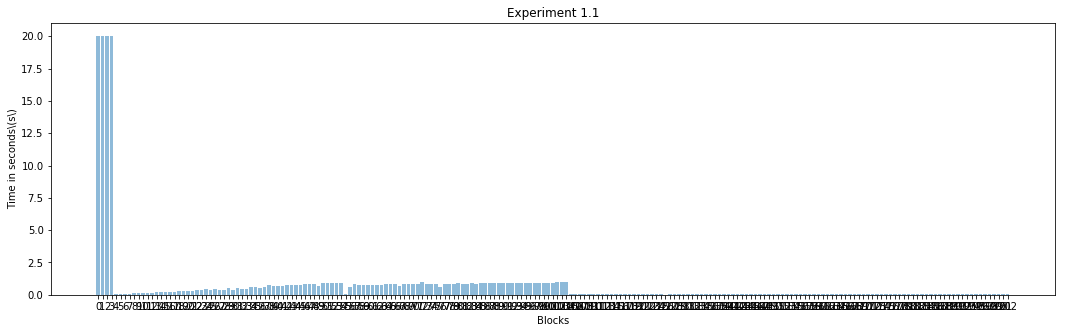

There are 203 Blocks


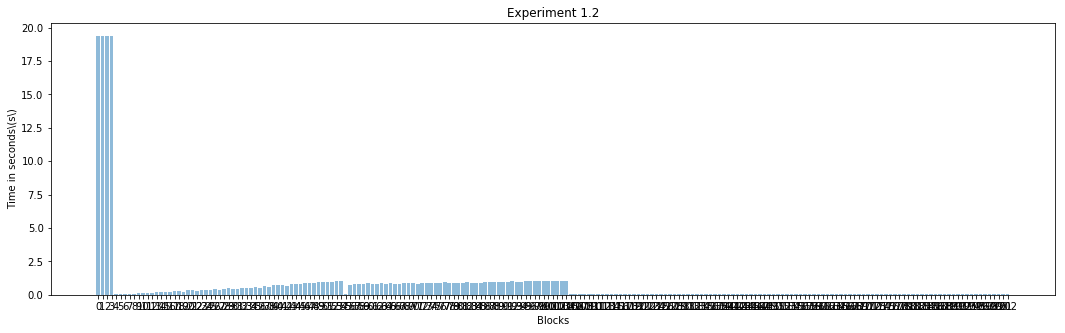

There are 103 Blocks


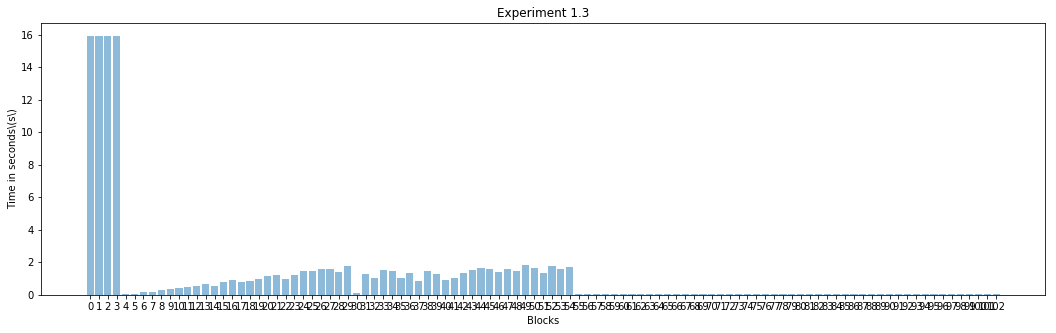

There are 73 Blocks


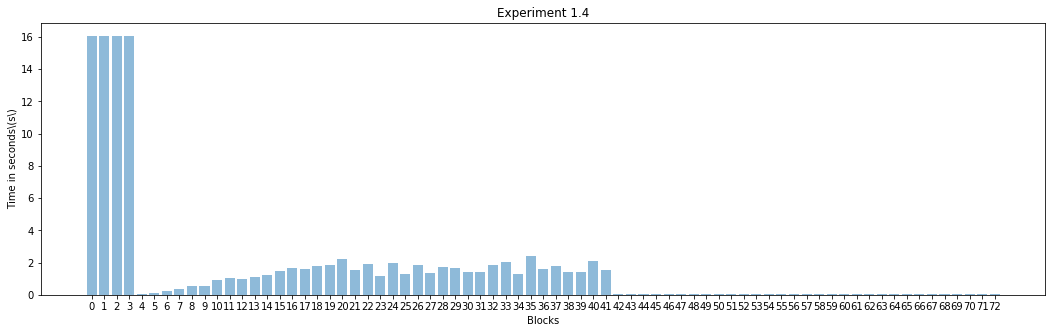

In [22]:
for j in range(1, 5):
    blocks = []
    print("There are %s Blocks"%len(experiment1Results[j-1]))
    for i in range(len(experiment1Results[j-1])):
        blocks.append(str(i))

    propogation_time= experiment1Results[j-1]
    y_pos = np.arange(len(propogation_time))
    # performance = [10,8,6,4,2,1]
    propogation_time = propogation_time
    plt.subplots(figsize=(18,5))
    plt.bar(y_pos, propogation_time, width=.8, align='center', alpha=0.5 )
    plt.xticks(y_pos, blocks)
    plt.ylabel('Time in seconds\(s\)')
    plt.title('Experiment 1.%s'% j)
    plt.xlabel('Blocks')

    plt.show()

# Experiment 2 Effect of the Preferred Batch Size

| Experiment     | Batch Time Out (seconds) | Prefered Batch Size(KB) | Endorsement Policy | Transaction Rate |
|----------------|-------------------------|-------------------------|--------------------|------------------|
| Experiment 2.1 | 10                      | 8 KB                    | All AND            | 1 per 2 sec      |
| Experiment 2.2 | 10                      | 16 KB                   | All AND            | 1 per 2 sec      |
| Experiment 2.3 | 10                      | 32 KB                   | All AND            | 1 per 2 sec      |
| Experiment 2.4 | 10                      | 32 KB                   | All AND            | 1 per 5 sec      |

There are 479 Blocks


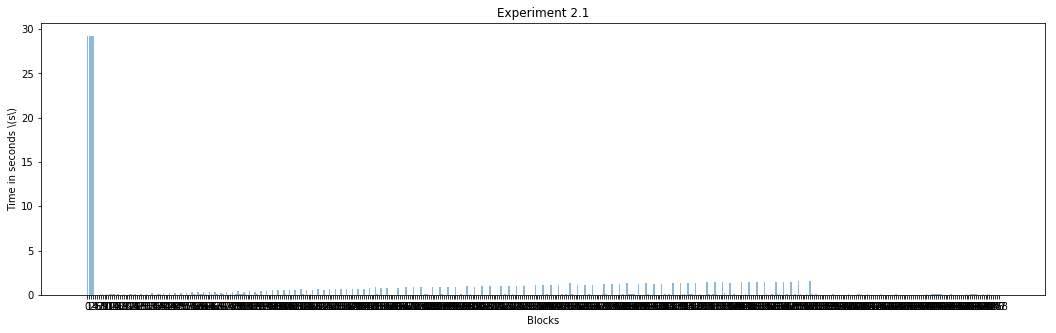

There are 479 Blocks


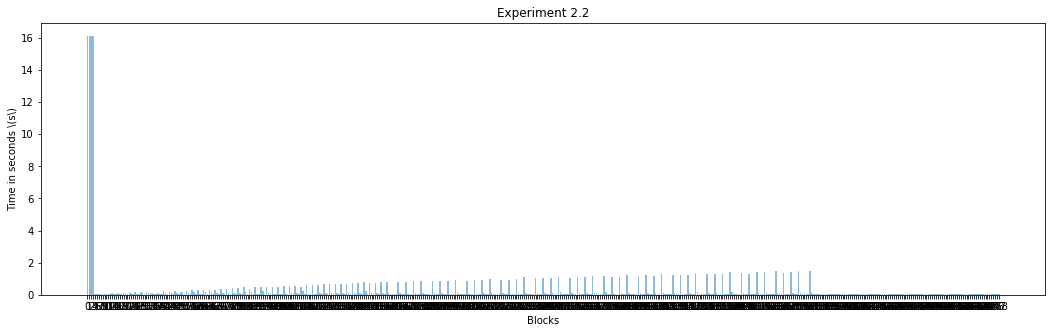

There are 479 Blocks


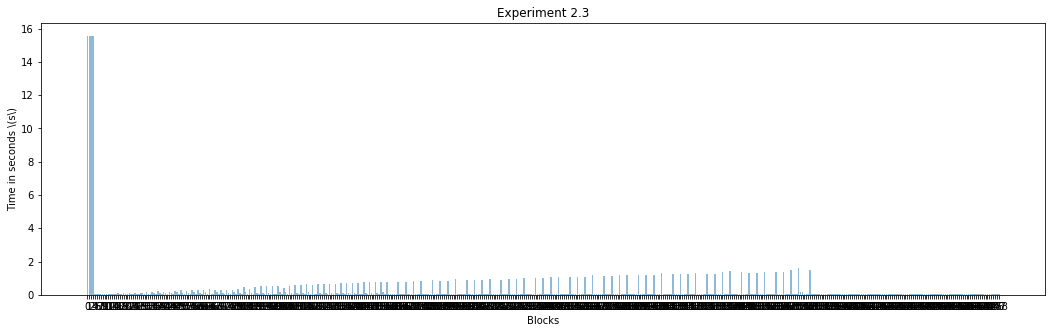

There are 477 Blocks


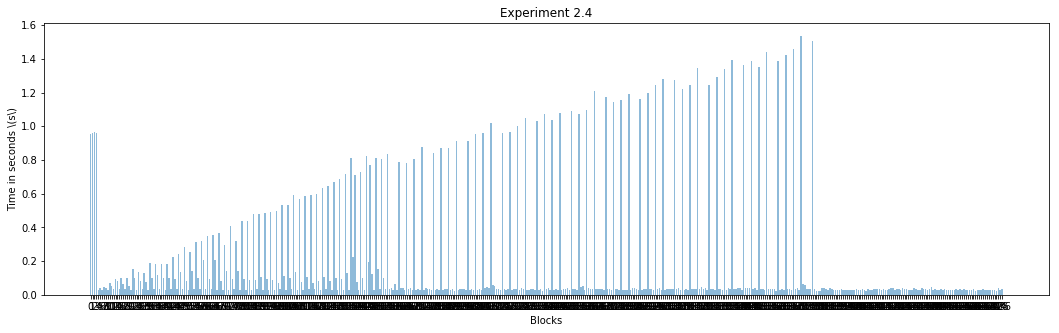

In [23]:
for j in range(1, 5):
    blocks = []
    print("There are %s Blocks"%len(experiment2Results[j-1]))
    for i in range(len(experiment2Results[j-1])):
        blocks.append(str(i))

    propogation_time= experiment2Results[j-1]
    y_pos = np.arange(len(propogation_time))
    # performance = [10,8,6,4,2,1]
    plt.subplots(figsize=(18,5))
    plt.bar(y_pos, propogation_time, width=.8, align='center', alpha=0.5 )
    plt.xticks(y_pos, blocks)
    plt.ylabel('Time in seconds \(s\)')
    plt.xlabel('Blocks')
    plt.title('Experiment 2.%s'% j)

    plt.show()

# Experiment 3 Effect of Endorsement Policy

| Experiment     | Batch TimeOut (seconds) | Prefered Batch Size(KB) | Endorsement Policy | Transaction Rate |
|----------------|-------------------------|-------------------------|--------------------|------------------|
| Experiment 3.1 | 10                      | 16 KB                   | All OR             | 1 per 5 sec      |
| Experiment 3.2 | 10                      | 16 KB                   | All AND            | 1 per 5 sec      |
| Experiment 3.3 | 10                      | 16 KB                   | 2 Out Of All       | 1 per 5 sec      |
| Experiment 3.4 | 10                      | 16 KB                   | 3 Out Of All       | 1 per 5 sec      |

There are 475 Blocks


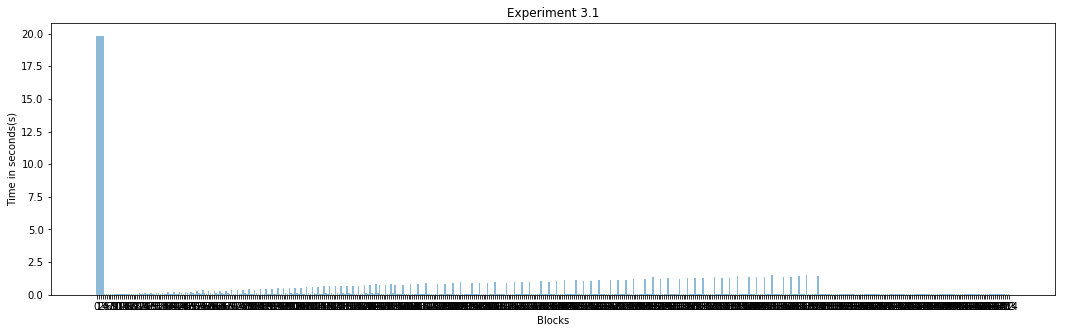

There are 479 Blocks


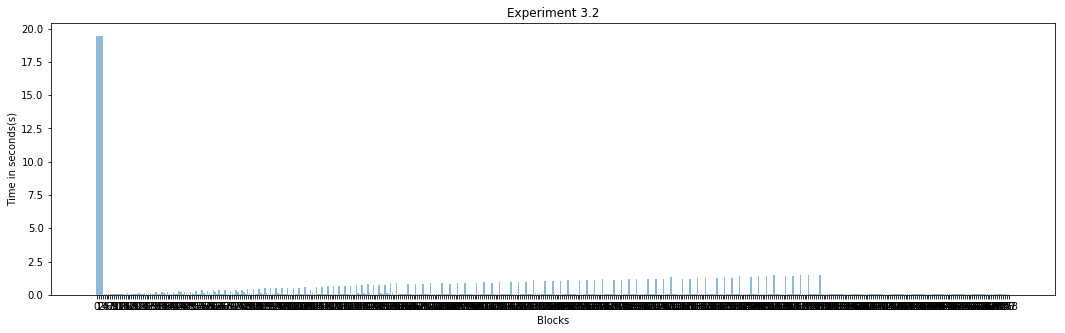

There are 478 Blocks


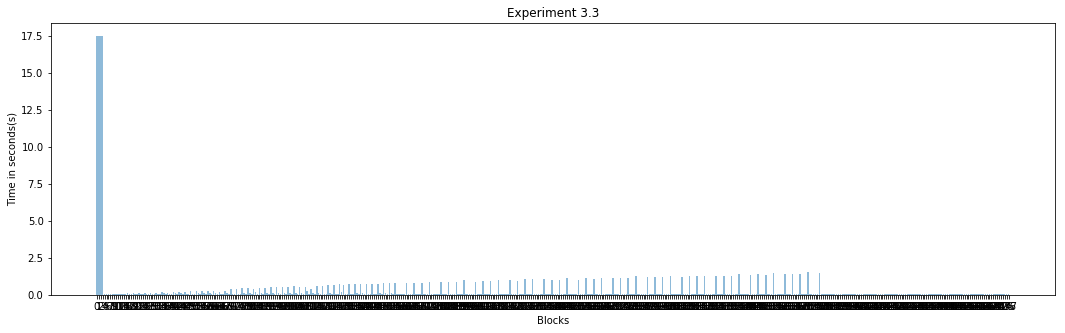

There are 479 Blocks


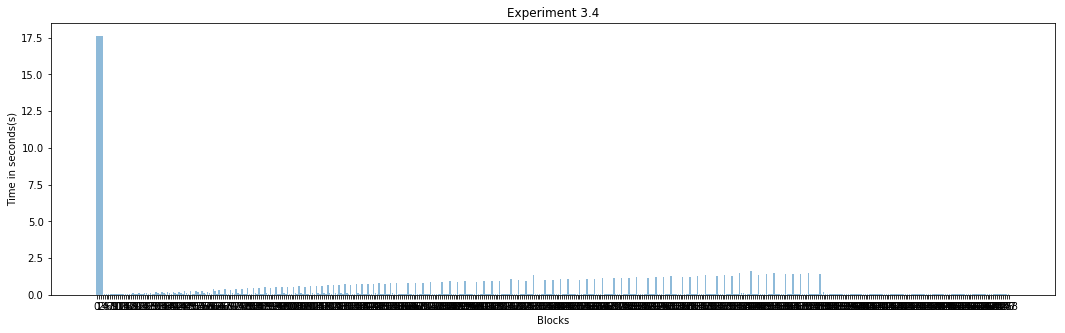

In [24]:
for j in range(1, 5):
    blocks = []
    print("There are %s Blocks"%len(experiment3Results[j-1]))
    for i in range(len(experiment3Results[j-1])):
        blocks.append(str(i))

    propogation_time= experiment3Results[j-1]
    y_pos = np.arange(len(propogation_time))
    # performance = [10,8,6,4,2,1]
    plt.subplots(figsize=(18,5))
    plt.bar(y_pos, propogation_time, width=.8, align='center', alpha=0.5 )
    plt.xticks(y_pos, blocks)
    plt.ylabel('Time in seconds(s)')
    plt.xlabel('Blocks')
    plt.title('Experiment 3.%s'% j)

    plt.show()

# Experiment 4 Effect Of Transaction Rate

| Experiment     | Batch TimeOut (seconds) | Prefered Batch Size(KB) | Endorsement Policy | Transaction Rate |
|----------------|-------------------------|-------------------------|--------------------|------------------|
| Experiment 4.1 | 10                      | 36 KB                   | All OR             | 1 per sec        |
| Experiment 4.2 | 10                      | 36 KB                   | All OR             | 1 per 2 sec      |
| Experiment 4.3 | 10                      | 36 KB                   | All OR             | 1 per 5 sec      |
| Experiment 4.4 | 10                      | 36 KB                   | All OR             | 1 per 10 sec     |

There are 479 Blocks


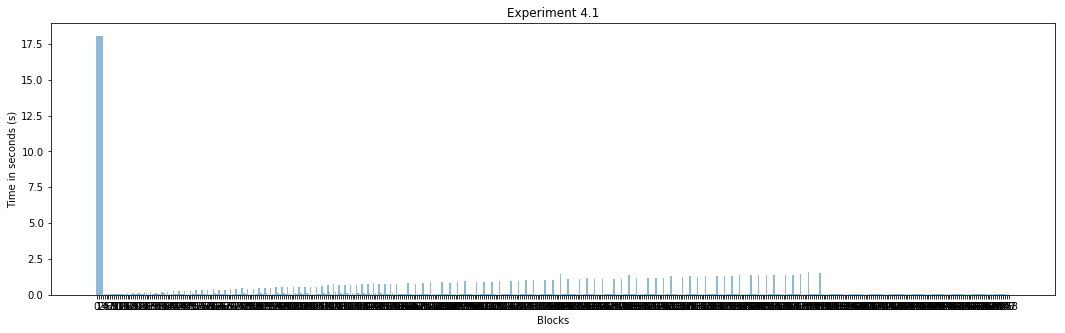

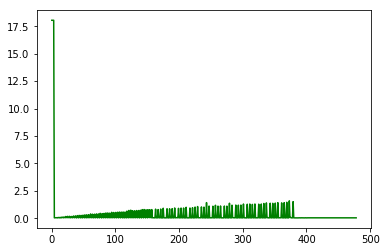

There are 479 Blocks


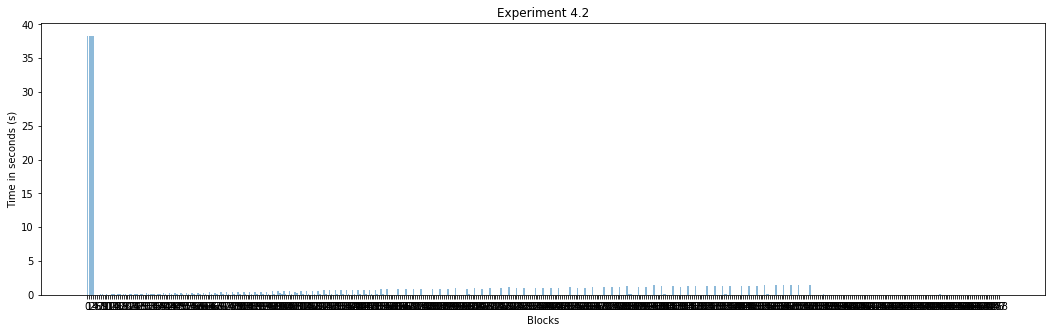

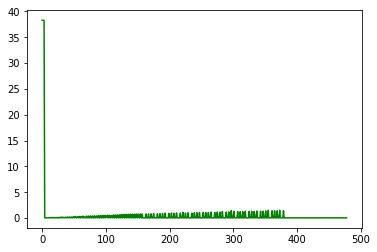

There are 479 Blocks


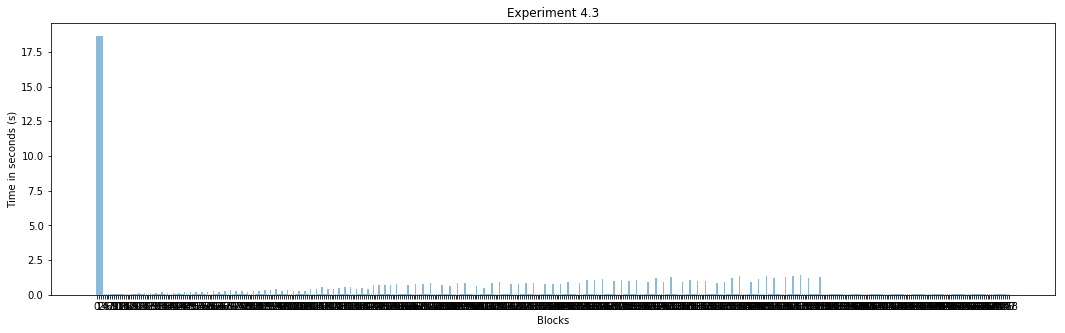

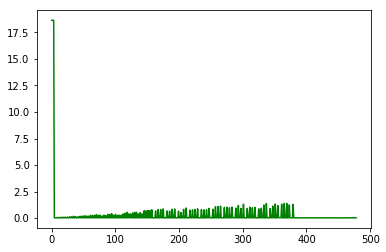

There are 479 Blocks


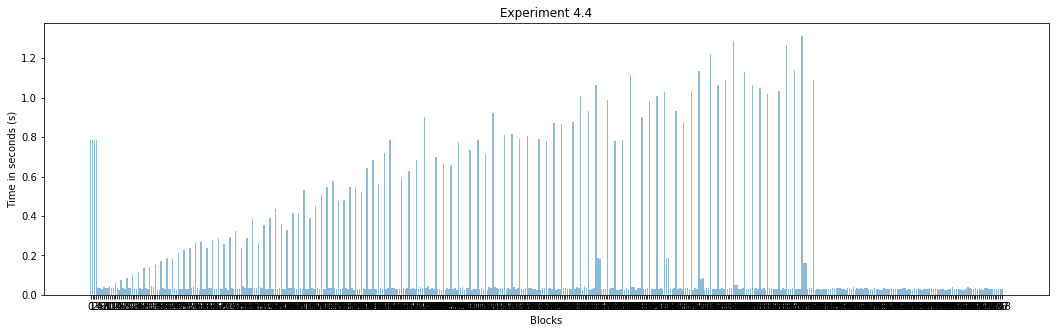

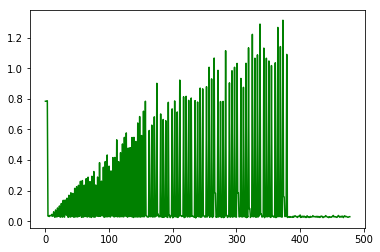

In [25]:
for j in range(1, 5):
    blocks = []
    print("There are %s Blocks"%len(experiment4Results[j-1]))
    for i in range(len(experiment4Results[j-1])):
        blocks.append(str(i))

    propogation_time= experiment4Results[j-1]
    y_pos = np.arange(len(propogation_time))
    # performance = [10,8,6,4,2,1]
    plt.subplots(figsize=(18,5))
    plt.bar(y_pos, propogation_time, width=.8, align='center', alpha=0.5 )
    plt.xticks(y_pos, blocks)
    plt.ylabel('Time in seconds (s)')
    plt.xlabel('Blocks')
    plt.title('Experiment 4.%s'% j)

    plt.show()
#     plt2.subplots(figsize=(18,5))
    plt.plot(y_pos, propogation_time, color='g')    
    plt.show()

4
{0: [20.014, 20.012, 20.025, 20.015], 1: [19.372, 19.376, 19.382, 19.38], 2: [15.917, 15.9, 15.904, 15.907], 3: [16.065, 16.042, 16.048, 16.041]}


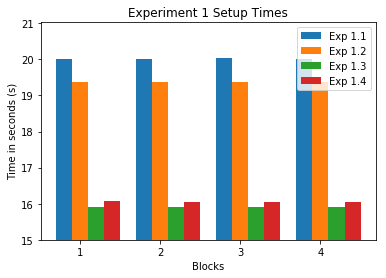

4
{0: [29.202, 29.212, 29.22, 29.241], 1: [16.116, 16.097, 16.096, 16.097], 2: [15.56, 15.542, 15.547, 15.542], 3: [0.957, 0.959, 0.965, 0.96]}


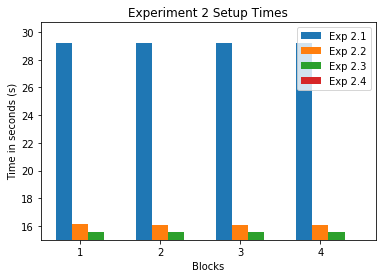

4
{0: [19.812, 19.808, 19.816, 19.811], 1: [19.433, 19.439, 19.445, 19.446], 2: [17.498, 17.502, 17.508, 17.513], 3: [17.617, 17.62, 17.619, 17.621]}


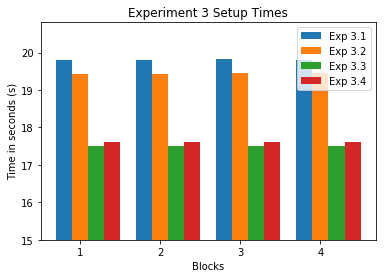

4
{0: [18.046, 18.045, 18.049, 18.046], 1: [38.306, 38.294, 38.285, 38.272], 2: [18.639, 18.639, 18.646, 18.642], 3: [0.784, 0.784, 0.786, 0.787]}


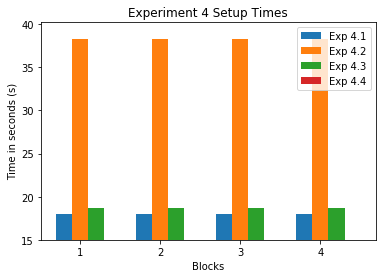

In [26]:
#Graphs to show setup times

print(len(experiment1Results))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment1Results[i][:4]

print(setup_blocks)
# plt.subplots(figsize=(18,5))
# for i in range(4):
#     plt.bar([1,2,3,4], setup_blocks[i] )
legend_plot = []
width = 0.20
index = [1,2,3,4]
legend_plot.append(plt.bar(index, setup_blocks[0], width, label = 'Exp 1.1'))
legend_plot.append(plt.bar([i+width for i in index], setup_blocks[1], width, label = 'Exp 1.2'))
legend_plot.append(plt.bar([i+width+width for i in index], setup_blocks[2], width, label = 'Exp 1.3'))
legend_plot.append(plt.bar([i+width*3 for i in index], setup_blocks[3], width, label = 'Exp 1.4'))
plt.xticks([i+width for i in index],[1,2,3,4])
plt.ylim(15,)
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 1 Setup Times')
plt.legend(loc='best')

# plt.legend(legend_plot, ["Exp 1.1", "Exp 1.2", "Exp 1.4", "Exp 1.3"])
plt.show()

print(len(experiment2Results))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment2Results[i][:4]

print(setup_blocks)
# plt.subplots(figsize=(18,5))
# for i in range(4):
#     plt.bar([1,2,3,4], setup_blocks[i] )
legend_plot = []
width = 0.20
index = [1,2,3,4]
legend_plot.append(plt.bar(index, setup_blocks[0], width, label = 'Exp 2.1'))
legend_plot.append(plt.bar([i+width for i in index], setup_blocks[1], width, label = 'Exp 2.2'))
legend_plot.append(plt.bar([i+width+width for i in index], setup_blocks[2], width, label = 'Exp 2.3'))
legend_plot.append(plt.bar([i+width*3 for i in index], setup_blocks[3], width, label = 'Exp 2.4'))
plt.xticks([i+width for i in index],[1,2,3,4])
plt.ylim(15,)
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 2 Setup Times')
plt.legend(loc='best')

# plt.legend(legend_plot, ["Exp 1.1", "Exp 1.2", "Exp 1.4", "Exp 1.3"])
plt.show()

print(len(experiment3Results))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment3Results[i][:4]

print(setup_blocks)
# plt.subplots(figsize=(18,5))
# for i in range(4):
#     plt.bar([1,2,3,4], setup_blocks[i] )
legend_plot = []
width = 0.20
index = [1,2,3,4]
legend_plot.append(plt.bar(index, setup_blocks[0], width, label = 'Exp 3.1'))
legend_plot.append(plt.bar([i+width for i in index], setup_blocks[1], width, label = 'Exp 3.2'))
legend_plot.append(plt.bar([i+width+width for i in index], setup_blocks[2], width, label = 'Exp 3.3'))
legend_plot.append(plt.bar([i+width*3 for i in index], setup_blocks[3], width, label = 'Exp 3.4'))
plt.xticks([i+width for i in index],[1,2,3,4])
plt.ylim(15,)
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 3 Setup Times')
plt.legend(loc='best')

# plt.legend(legend_plot, ["Exp 1.1", "Exp 1.2", "Exp 1.4", "Exp 1.3"])
plt.show()

print(len(experiment4Results))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment4Results[i][:4]

print(setup_blocks)
# plt.subplots(figsize=(18,5))
# for i in range(4):
#     plt.bar([1,2,3,4], setup_blocks[i] )
legend_plot = []
width = 0.20
index = [1,2,3,4]
legend_plot.append(plt.bar(index, setup_blocks[0], width, label = 'Exp 4.1'))
legend_plot.append(plt.bar([i+width for i in index], setup_blocks[1], width, label = 'Exp 4.2'))
legend_plot.append(plt.bar([i+width+width for i in index], setup_blocks[2], width, label = 'Exp 4.3'))
legend_plot.append(plt.bar([i+width*3 for i in index], setup_blocks[3], width, label = 'Exp 4.4'))
plt.xticks([i+width for i in index],[1,2,3,4])
plt.ylim(15,)
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 4 Setup Times')
plt.legend(loc='best')

# plt.legend(legend_plot, ["Exp 1.1", "Exp 1.2", "Exp 1.4", "Exp 1.3"])
plt.show()


4
(0, 199)
(1, 199)
(2, 99)
(3, 69)


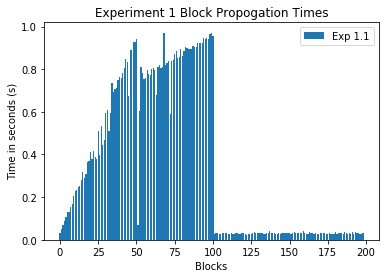

In [27]:
#Graphs to show propogation times
print(len(experiment1Results))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment1Results[i][4:]
    print(i, len(setup_blocks[i]))
# print(setup_blocks)
# plt.subplots(figsize=(18,5))
# for i in range(4):
#     plt.bar([1,2,3,4], setup_blocks[i] )
legend_plot = []
width = 0.20
index = [1,2,3,4]
legend_plot.append(plt.bar([i for i in range(len(setup_blocks[0]))], setup_blocks[0], label = 'Exp 1.1'))
# legend_plot.append(plt.bar([i+width for i in index], setup_blocks[1], width, label = 'Exp 1.2'))
# legend_plot.append(plt.bar([i+width+width for i in index], setup_blocks[2], width, label = 'Exp 1.3'))
# legend_plot.append(plt.bar([i+width*3 for i in index], setup_blocks[3], width, label = 'Exp 1.4'))
# plt.xticks([i+width for i in index],[1,2,3,4])
# plt.ylim(15,)
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 1 Block Propogation Times')
plt.legend(loc='best')

# plt.legend(legend_plot, ["Exp 1.1", "Exp 1.2", "Exp 1.4", "Exp 1.3"])
plt.show()

4
203
203
103
73


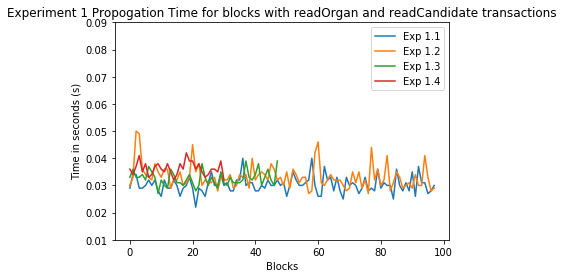

4
479
479
479
477


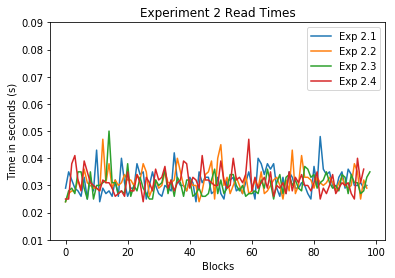

4
475
479
478
479


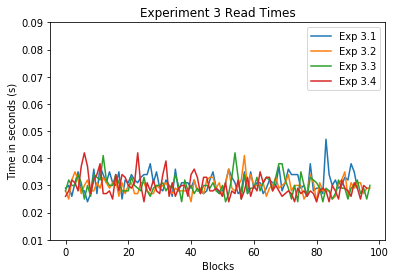

4
479
479
479
479


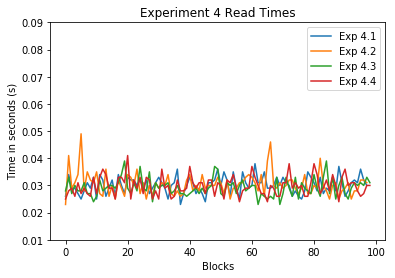

In [28]:
print(len(experiment1Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment1Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment1Results[0][105:]
setup_blocks[1] = experiment1Results[1][105:]
setup_blocks[2] = experiment1Results[2][55:]
setup_blocks[3] = experiment1Results[3][42:]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 1 Propogation Time for blocks with readOrgan and readCandidate transactions')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 1.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 1.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 1.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 1.4')
plt.legend(loc='best')
plt.ylim(0.010,0.09)
plt.show()

print(len(experiment2Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment2Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment2Results[0][381:]
setup_blocks[1] = experiment2Results[1][381:]
setup_blocks[2] = experiment2Results[2][380:]
setup_blocks[3] = experiment2Results[3][380:]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 2 Read Times')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 2.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 2.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 2.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 2.4')
plt.legend(loc='best')
plt.ylim(0.010,0.09)
plt.show()

print(len(experiment3Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment3Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment3Results[0][381:]
setup_blocks[1] = experiment3Results[1][381:]
setup_blocks[2] = experiment3Results[2][380:]
setup_blocks[3] = experiment3Results[3][382:]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 3 Read Times')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 3.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 3.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 3.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 3.4')
plt.legend(loc='best')
plt.ylim(0.010,0.09)
plt.show()

print(len(experiment4Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment4Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment4Results[0][381:]
setup_blocks[1] = experiment4Results[1][381:]
setup_blocks[2] = experiment4Results[2][380:]
setup_blocks[3] = experiment4Results[3][380:]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 4 Read Times')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 4.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 4.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 4.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 4.4')
plt.legend(loc='best')
plt.ylim(0.010,0.09)
plt.show()

4
203
203
103
73


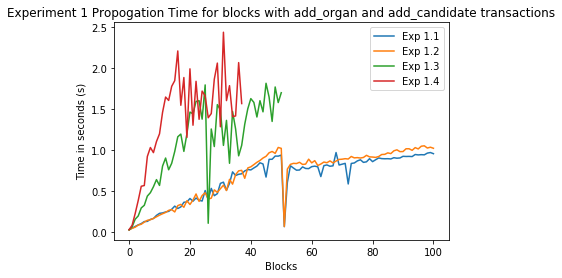

4
479
479
479
477


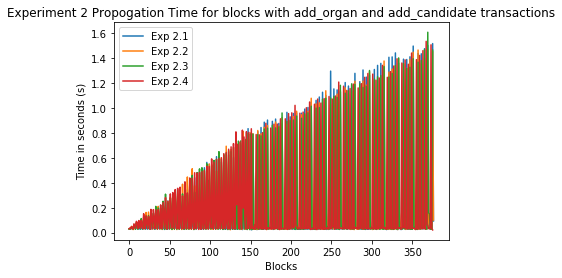

4
475
479
478
479


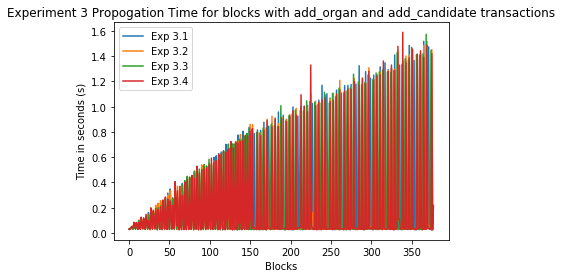

4
479
479
479
479


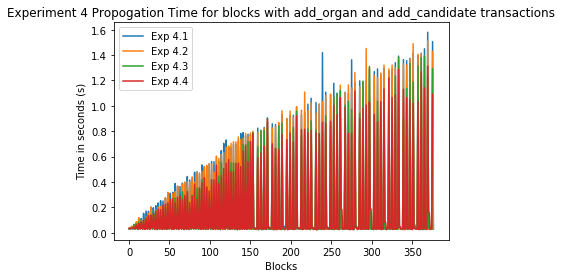

In [29]:
print(len(experiment1Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment1Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment1Results[0][4:105]
setup_blocks[1] = experiment1Results[1][4:105]
setup_blocks[2] = experiment1Results[2][4:55]
setup_blocks[3] = experiment1Results[3][4:42]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 1 Propogation Time for blocks with add_organ and add_candidate transactions')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 1.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 1.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 1.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 1.4')
plt.legend(loc='best')
# plt.ylim(0.010,0.09)
plt.show()

print(len(experiment2Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment2Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment2Results[0][4:381]
setup_blocks[1] = experiment2Results[1][4:381]
setup_blocks[2] = experiment2Results[2][4:380]
setup_blocks[3] = experiment2Results[3][4:380]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 2 Propogation Time for blocks with add_organ and add_candidate transactions')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 2.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 2.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 2.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 2.4')
plt.legend(loc='best')
# plt.ylim(0.010,0.09)
plt.show()

print(len(experiment3Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment3Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment3Results[0][4:381]
setup_blocks[1] = experiment3Results[1][4:381]
setup_blocks[2] = experiment3Results[2][4:380]
setup_blocks[3] = experiment3Results[3][4:382]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 3 Propogation Time for blocks with add_organ and add_candidate transactions')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 3.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 3.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 3.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 3.4')
plt.legend(loc='best')
# plt.ylim(0.010,0.09)
plt.show()

print(len(experiment4Results))

setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment4Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment4Results[0][4:381]
setup_blocks[1] = experiment4Results[1][4:381]
setup_blocks[2] = experiment4Results[2][4:380]
setup_blocks[3] = experiment4Results[3][4:380]
plt.ylabel('Time in seconds (s)')
plt.xlabel('Blocks')
plt.title('Experiment 4 Propogation Time for blocks with add_organ and add_candidate transactions')
plt.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 4.1')
plt.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 4.2')
plt.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 4.3')
plt.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 4.4')
plt.legend(loc='best')
# plt.ylim(0.010,0.09)
plt.show()

{0: [29.202, 29.212, 29.22, 29.241], 1: [16.116, 16.097, 16.096, 16.097], 2: [15.56, 15.542, 15.547, 15.542], 3: [0.957, 0.959, 0.965, 0.96]}


(15, 30.70305)

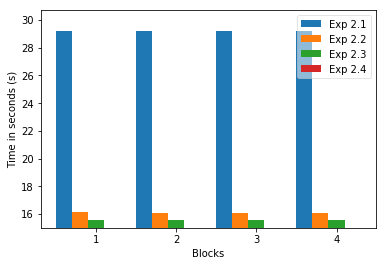

In [30]:
for i in range(4):
        setup_blocks[i] = experiment2Results[i][:4]
print setup_blocks
exp2fig2,( ax2 )= plt.subplots(1,1)
#     exp1fig2, ax2 = plt.subplots()
#     exp1fig3, ax3 = plt.subplots()
#     exp1fig1.suptitle('This is a somewhat long figure title', fontsize=16)
width = 0.20
index = [1,2,3,4]
ax2.bar(index, setup_blocks[0], width, label = 'Exp 2.1')
ax2.bar([i+width for i in index], setup_blocks[1], width, label = 'Exp 2.2')
ax2.bar([i+width+width for i in index], setup_blocks[2], width, label = 'Exp 2.3')
ax2.bar([i+width*3 for i in index], setup_blocks[3], width, label = 'Exp 2.4')
ax2.legend(loc='best', framealpha= 0.5)
ax2.set_ylabel('Time in seconds (s)')
ax2.set_xlabel('Blocks')
ax2.set_title('')
ax2.set_xticks([i+width*2 for i in index])
ax2.set_xticklabels(index)
ax2.set_ylim(15,)
# exp2fig2.savefig("Setup_time_Exp2.png")

4
203
203
103
73
4
479
479
479
477
4
475
479
478
479
4
479
479
479
479


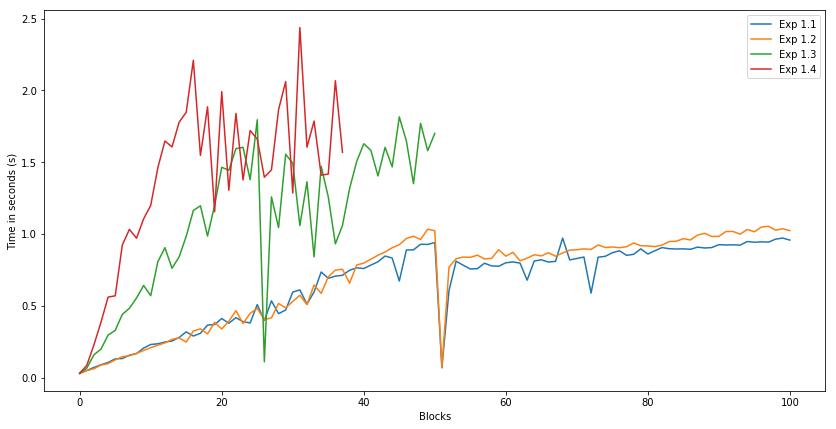

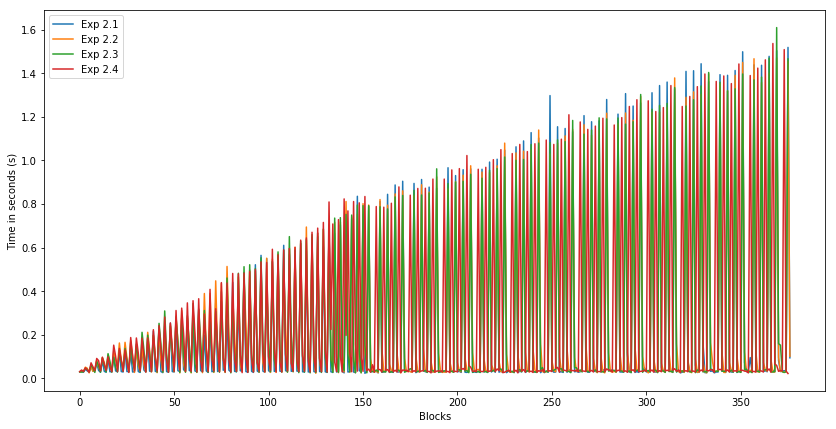

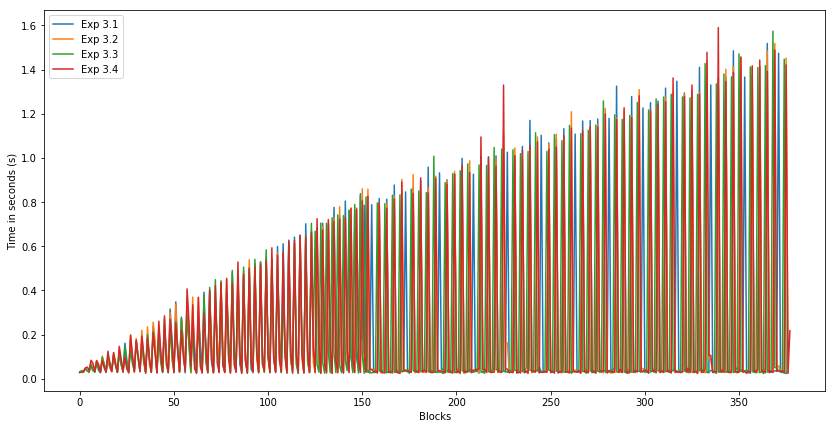

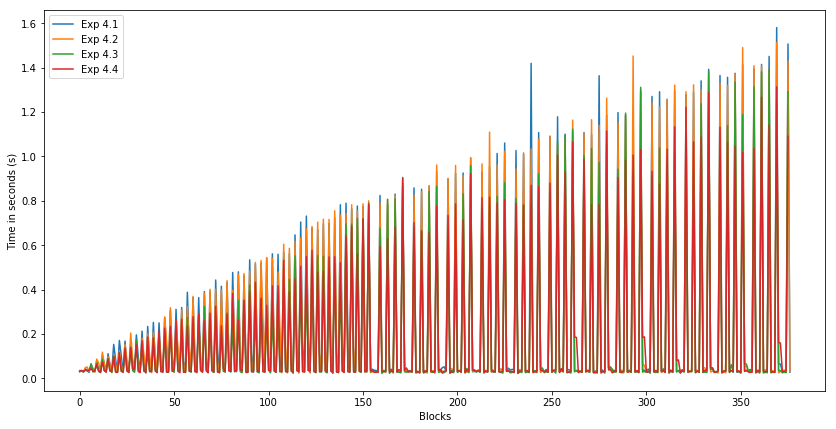

In [31]:
print(len(experiment1Results))
exp1fig1,( ax1 )= plt.subplots(1,1, figsize=(14, 7))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment1Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment1Results[0][4:105]
setup_blocks[1] = experiment1Results[1][4:105]
setup_blocks[2] = experiment1Results[2][4:55]
setup_blocks[3] = experiment1Results[3][4:42]
ax1.set_ylabel('Time in seconds (s)')
ax1.set_xlabel('Blocks')
# plt.title('Experiment 1 Propogation Time for blocks with add_candidate and add_organ transactions')
ax1.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 1.1')
ax1.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 1.2')
ax1.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 1.3')
ax1.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 1.4')
ax1.legend(loc='best')
# plt.tight_layout()
# plt.ylim(0.010,0.09)
# ax1.show()
exp1fig1.savefig("Scheme_2_Write_time_Exp1.png")

print(len(experiment2Results))
exp2fig2,( ax2 )= plt.subplots(1,1, figsize=(14, 7))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment2Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment2Results[0][4:381]
setup_blocks[1] = experiment2Results[1][4:381]
setup_blocks[2] = experiment2Results[2][4:380]
setup_blocks[3] = experiment2Results[3][4:380]
ax2.set_ylabel('Time in seconds (s)')
ax2.set_xlabel('Blocks')
# plt.title('Experiment 2 Propogation Time for blocks with add_candidate and add_organ transactions')
ax2.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 2.1')
ax2.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 2.2')
ax2.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 2.3')
ax2.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 2.4')
ax2.legend(loc='best')
# plt.ylim(0.010,0.09)
# ax2.show()
exp2fig2.savefig("Scheme_2_Write_time_Exp2.png")

print(len(experiment3Results))
exp3fig3,( ax3 )= plt.subplots(1,1, figsize=(14, 7))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment3Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment3Results[0][4:381]
setup_blocks[1] = experiment3Results[1][4:381]
setup_blocks[2] = experiment3Results[2][4:380]
setup_blocks[3] = experiment3Results[3][4:382]
ax3.set_ylabel('Time in seconds (s)')
ax3.set_xlabel('Blocks')
# plt.title('Experiment 3 Propogation Time for blocks with add_candidate and add_organ transactions')
ax3.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 3.1')
ax3.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 3.2')
ax3.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 3.3')
ax3.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 3.4')
ax3.legend(loc='best')
# plt.ylim(0.010,0.09)
# ax3.show()
exp3fig3.savefig("Scheme_2_Write_time_Exp3.png")

print(len(experiment4Results))
exp4fig4,( ax4 )= plt.subplots(1,1, figsize=(14,7))
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment4Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment4Results[0][4:381]
setup_blocks[1] = experiment4Results[1][4:381]
setup_blocks[2] = experiment4Results[2][4:380]
setup_blocks[3] = experiment4Results[3][4:380]
ax4.set_ylabel('Time in seconds (s)')
ax4.set_xlabel('Blocks')
# plt.title('Experiment 4 `Propogation Time for blocks with add_candidate and add_organ transactions')
ax4.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 4.1')
ax4.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 4.2')
ax4.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 4.3')
ax4.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 4.4')
ax4.legend(loc='best')
# plt.ylim(0.010,0.09)
# ax4.show()
exp4fig4.savefig("Scheme_2_Write_time_Exp4.png")

4
203
203
103
73
4
479
479
479
477
4
475
479
478
479
4
479
479
479
479


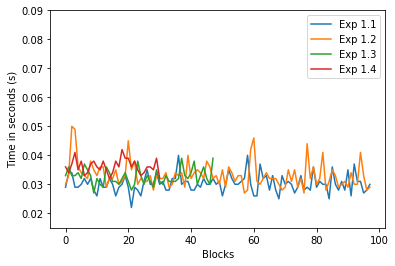

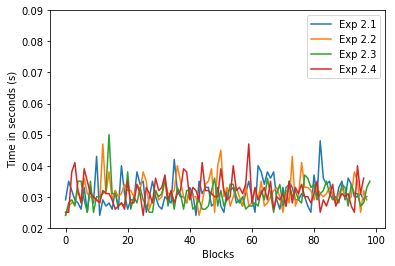

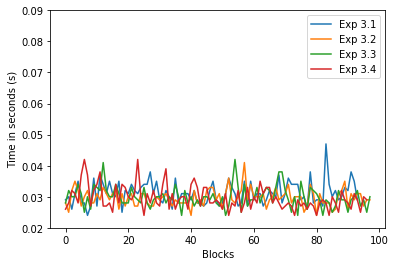

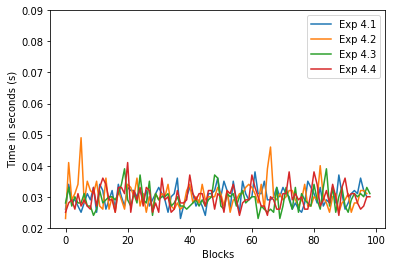

In [32]:
print(len(experiment1Results))
exp1fig1,( ax1 )= plt.subplots(1,1)
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment1Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment1Results[0][105:]
setup_blocks[1] = experiment1Results[1][105:]
setup_blocks[2] = experiment1Results[2][55:]
setup_blocks[3] = experiment1Results[3][42:]
ax1.set_ylabel('Time in seconds (s)')
ax1.set_xlabel('Blocks')
# ax1.title('Experiment 1 Read Times')
ax1.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 1.1')
ax1.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 1.2')
ax1.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 1.3')
ax1.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 1.4')
ax1.legend(loc='best')
ax1.set_ylim(0.015,0.09)
exp1fig1.savefig("Scheme_2_Read_time_Exp1.png")
# plt.show()

print(len(experiment2Results))
exp2fig2,( ax2 )= plt.subplots(1,1)
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment2Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment2Results[0][381:]
setup_blocks[1] = experiment2Results[1][381:]
setup_blocks[2] = experiment2Results[2][380:]
setup_blocks[3] = experiment2Results[3][380:]
ax2.set_ylabel('Time in seconds (s)')
ax2.set_xlabel('Blocks')
# ax2.title('Experiment 2 Read Times')
ax2.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 2.1')
ax2.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 2.2')
ax2.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 2.3')
ax2.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 2.4')
ax2.legend(loc='best')
ax2.set_ylim(0.020,0.09)
exp2fig2.savefig("Scheme_2_Read_time_Exp2.png")

# ax2.show()

print(len(experiment3Results))
exp3fig3,( ax3 )= plt.subplots(1,1)
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment3Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment3Results[0][381:]
setup_blocks[1] = experiment3Results[1][381:]
setup_blocks[2] = experiment3Results[2][380:]
setup_blocks[3] = experiment3Results[3][382:]
ax3.set_ylabel('Time in seconds (s)')
ax3.set_xlabel('Blocks')
# ax3.title('Experiment 3 Read Times')
ax3.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 3.1')
ax3.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 3.2')
ax3.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 3.3')
ax3.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 3.4')
ax3.legend(loc='best')
ax3.set_ylim(0.020,0.09)
exp3fig3.savefig("Scheme_2_Read_time_Exp3.png")

# ax3.show()

print(len(experiment4Results))
exp4fig4,( ax4 )= plt.subplots(1,1)
setup_blocks = {}
for i in range(4):
    setup_blocks[i] = experiment4Results[i][:]
    print(len(setup_blocks[i]))
setup_blocks[0] = experiment4Results[0][381:]
setup_blocks[1] = experiment4Results[1][381:]
setup_blocks[2] = experiment4Results[2][380:]
setup_blocks[3] = experiment4Results[3][380:]
ax4.set_ylabel('Time in seconds (s)')
ax4.set_xlabel('Blocks')
# ax4.title('Experiment 4 Read Times')
ax4.plot([i for i in range(len(setup_blocks[0]))],setup_blocks[0], label = 'Exp 4.1')
ax4.plot([i for i in range(len(setup_blocks[1]))],setup_blocks[1], label = 'Exp 4.2')
ax4.plot([i for i in range(len(setup_blocks[2]))],setup_blocks[2], label = 'Exp 4.3')
ax4.plot([i for i in range(len(setup_blocks[3]))],setup_blocks[3], label = 'Exp 4.4')
ax4.legend(loc='best')
ax4.set_ylim(0.020,0.09)
exp4fig4.savefig("Scheme_2_Read_time_Exp4.png")
